patches_296.jpg


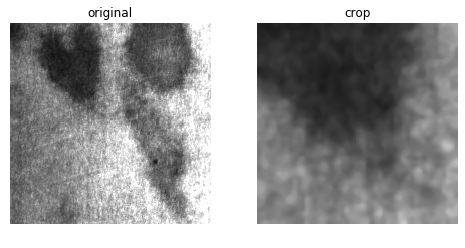

sum of jpg files = 278
278

crazing: 14
inclusion: 73
patches: 36
pitted_surface: 1
rolled_in_scale: 51
scratches: 103

train: 204
test: 74


In [1]:
from PIL import Image, ImageFilter
import xml.etree.ElementTree as ET
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = 50
y = 50
h = 50
w = 50

def crop_print(file):
    data_dir = "/home/taeho/다운로드/NEU-DET/"
        
    img = cv2.imread(data_dir + "IMAGES_COLOR/" + file)
    crop_img = img[y:y+h, x:x+w]
    resize_image = cv2.resize(crop_img, (200, 200))
    blur_img = cv2.medianBlur(resize_image, ksize = 5)
    
    plt.figure(figsize=(10,4))

    plt.subplot(131)
    plt.axis('off')
    plt.yticks([])
    plt.title('original')
    plt.imshow(img, cmap='gray')

    plt.subplot(132)
    plt.axis('off')
    plt.title('crop')
    plt.imshow(blur_img, cmap='gray')

    #plt.subplot(133)
    #plt.axis('off')
    #plt.title('GaussianBlur')
    #plt.imshow(img2, cmap='gray')
    plt.tight_layout()
    plt.show()
    return

abc = "patches_296.jpg"
print(abc)
crop_print(abc)

path = "/home/taeho/다운로드/NEU-DET/IMAGES_COLOR"
file_list = os.listdir(path)
file_list_jpg3 = [file for file in file_list if file.endswith(".jpg")]
#print(file_list_jpg3[0][:-4])

for file in file_list_jpg3:
    new_img = "/home/taeho/다운로드/NEU-DET/IMAGES_cropped/" + file[:-4] + "_cropped.jpg"
    xml_path = "/home/taeho/다운로드/NEU-DET/ANNOTATIONS/"
    
    xmin = []
    ymin = []
    xmax = []
    ymax = []
    #print(file[-4:])
    tree = ET.parse(xml_path + file[:-4] + ".xml")
    root = tree.getroot()

    for child in root.iter():
        tag = child.tag
        if tag == "xmin":
            xmin.append(int(child.text))
        if tag == "ymin":
            ymin.append(int(child.text))
        if tag == "xmax":
            xmax.append(int(child.text))
        if tag == "ymax":
            ymax.append(int(child.text))
    
    file = path + "/" + file
    img = cv2.imread(file, 0)
    
    check = 0
    result = 0
    for i in range(len(xmin)):
        #print(xmin[i])
        #y:y+h, x:x+w
        if (xmin[i]>(x+w)) or (xmax[i]<x) or (ymin[i]>y+h) or (ymax[i]<(y)):
            check += 1
        #elif ymin[i] < 
        #if (xmax[i]<85 and ymax[i]<85) or (xmin[i]>115 and ymin[i]>115):
        #    check += 1
        else:
            check += 0
        #if (xmin[i]>115 and ymax[i]<85) or (ymin[i]>115 and xmax[i]<85):
        #    check += 1
        #else:
        #    check += 0
        if check == len(xmin):
            result = 1
        else:
            result = 0
    
    #print(check)
    if result is 1:
        #y:y+h, x:x+w
        crop_img = img[y:y+h, x:x+w]
        resize_image = cv2.resize(crop_img, (200, 200))
        blur_img = cv2.medianBlur(resize_image, ksize = 5)
        cv2.imwrite(new_img, blur_img)
    else:
        continue
    
#####################################


filelist = []

def search(dirname):
    total = 0
    filenames = os.listdir(dirname)
    
    for filename in filenames:
        full_filename = os.path.join(dirname, filename)
        ext = os.path.splitext(full_filename)[-1]
        #if ext == '.jpg': 
            #print(full_filename)
            
        if ext == '.jpg':
            #print(filename)
            total += filename.count('.jpg')
            filelist.append(filename[:-4])
            
    print("sum of jpg files =", total)
    

search("/home/taeho/다운로드/NEU-DET/IMAGES_cropped")
print(len(filelist))
#print(filelist[0])

crazing = []
inclusion = []
patches = []
pitted_surface = []
rolled_in_scale = []
scratches = []

for file in filelist:
    a = file.find("crazing")
    b = file.find("inclusion")
    c = file.find("patches")
    d = file.find("pitted_surface")
    e = file.find("rolled-in_scale")
    f = file.find("scratches")
    
    if a is not -1:
        crazing.append(file)
    if b is not -1:
        inclusion.append(file)
    if c is not -1:
        patches.append(file)
    if d is not -1:
        pitted_surface.append(file)
    if e is not -1:
        rolled_in_scale.append(file)
    if f is not -1:
        scratches.append(file)
        
print()
print("crazing: %d" %len(crazing))
print("inclusion: %d" %len(inclusion))
print("patches: %d" %len(patches))
print("pitted_surface: %d" %len(pitted_surface))
print("rolled_in_scale: %d" %len(rolled_in_scale))
print("scratches: %d" %len(scratches))

train = []
test = []

train_size = int(len(scratches)*0.5)
train = (
    crazing[:train_size] + inclusion[:train_size] + patches[:train_size] +
    pitted_surface[:train_size] + rolled_in_scale[:train_size] + scratches[:train_size]
)
test = (
    crazing[train_size:] + inclusion[train_size:] + patches[train_size:] +
    pitted_surface[train_size:] + rolled_in_scale[train_size:] + scratches[train_size:]
)
print()
print("train: %d" %len(train))
print("test: %d" %len(test))

f = open("train_cropped.txt", 'w')
for i, name in enumerate(train):
    f.write(name + "\n")
    #f.write("\n")
    
f.close()

f = open("test_cropped.txt", 'w')
for i, name in enumerate(test):
    f.write(name + "\n")
    #f.write("\n")
    
f.close()
